# Nearest Neighbors machine learning algorithm

In [1]:
import matplotlib.pyplot as plt
import random
from math import sqrt
import numpy as np

D = 2  # number of dimensions

In [2]:
class Point:    
    def __init__(self, arr, tof):
        self.coords = arr
        self.bool = tof  # tof = true of false

### Euclidean distance from point 1 to point 2 in any number of dimensions

In [9]:
def euclidean_dist(D, p1, p2):
    sum = 0
    for i in range(D):
         sum += (p2.coords[i] - p1.coords[i]) ** 2
    return sum ** -2

## Calculate distance from one point to all others

In [4]:
def distances(D, dataset, comp):
    dist = {}
    for i in range(len(dataset)):
        dist[i] = euclidean_dist(D, comp, dataset[i])
    dist = sorted(dist.items(), key=lambda item: item[1])
    return dist

### First K elements from distances

In [5]:
def nearest_neighbors(k, dataset, comp):
    t = 0
    f = 0
    dist = distances(D, dataset, comp)
    temp = []
    for i in range(k):
        temp.append(dataset[dist[i][0]])
        if dataset[dist[i][0]].bool == True:
            t += 1
        else: f += 1

    if t > f:
        return True
    return False

### Main

In [6]:
x_true = []
y_true = []

x_false = []
y_false = []

dataset = []
tof = [False, True]
for i in range(100):
    if i % 2 == 0:
        temp_x = np.random.normal(loc=-1.0, scale=0.5, size=10)
        temp_y = np.random.normal(loc=1.0, scale=0.5, size=10)
        dataset.append(Point((temp_x, temp_y), tof[0]))
    else:
        temp_x = np.random.normal(loc=2.0, scale=0.5, size=10)
        temp_y = np.random.normal(loc=4.0, scale=0.5, size=10)
        dataset.append(Point((temp_x, temp_y), tof[1]))
    
    if dataset[i].bool:
        x_true.append(dataset[i].coords[0])
        y_true.append(dataset[i].coords[1])
    else:
        x_false.append(dataset[i].coords[0])
        y_false.append(dataset[i].coords[1])

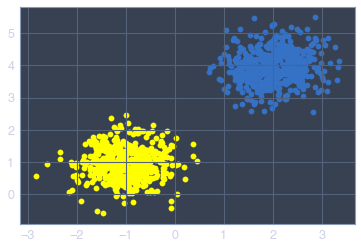

In [7]:
plt.scatter(x_true, y_true);
plt.scatter(x_false, y_false, c='yellow');
plt.show()

In [10]:
test = Point([2, 10], False)
test.bool = nearest_neighbors(5, dataset, test)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()